## **Objective one: extract point datas from climate data Spei 12,24 & 48 

KeysView(<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 1464)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2022-12-16
Data variables:
    spei     (time, lat, lon) float32 ...
    crs      int32 ...
Attributes: (12/15)
    Conventions:  CF-1.8
    title:        Global 48-months SPEI, z-values, 0.5 degree
    version:      2.9
    id:           ../outputNcdf/spei48.nc
    summary:      Global dataset of the Standardized Precipitation-Evapotrans...
    keywords:     drought, climatology, SPEI, Standardized Precipitation-Evap...
    ...           ...
    software:     Created in R using the SPEI package (https://cran.r-project...
    call:         spei.nc(sca=i, inPre=../inputData/cru_ts4.07.1901.2022.pre....
    date:         Thu Jun 22 03:55:22 2023
    reference:    Beguería S., Vicente-Serrano S

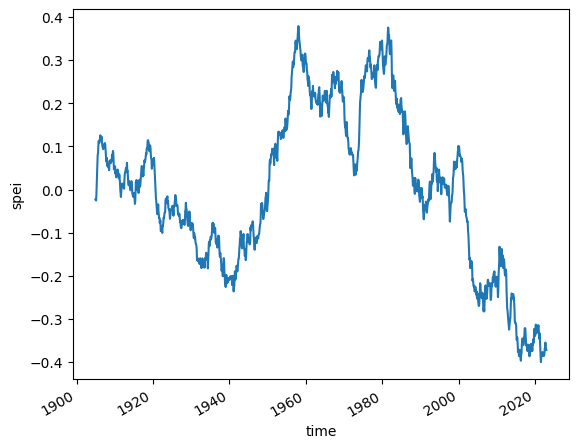

<Figure size 640x480 with 0 Axes>

In [7]:
import xarray as xr
import netCDF4 as nc
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature

da=xr.open_dataset('C:/Users/Addisu/Desktop/Spei/spei48.nc')
da

print(da.keys())
print(da)
# print attributes in file metadata
print(da.attrs)
# print a list of array dimensions
print(da.dims)
# print a list of array coordinates
print(da.coords)
# print time and lon dim labels
print(da.time)
print(da.lon)
ts = da.mean(dim=('lat','lon'))
print(ts)
ts['spei'].plot()
plt.show()
plt.clf()

In [8]:
import pandas as pd
import xarray as xr
import time

#Generate some coordinates
crd = pd.read_excel('C:/Users/Addisu/Desktop/Spei/Final_coord.xlsx')
#crd= pd.DataFrame(coords_data)
lat = crd["latitude"]
lon = crd["longitude"]
stid=crd["Name"]
temp = pd.DataFrame([])
#NC = xr.open_dataset(nc_file)
point_list = zip(lat,lon,stid)
start_time = time.time()

for i,j,Name in point_list:
    #print(i,j)
    dsloc = da.sel(lat=i,lon=j,method='nearest')
    #print("--- %s seconds ---" % (time.time() - start_time))
    DT=dsloc.to_dataframe()
    
    DT.insert(loc=0,column="Name",value=Name)
    DT.reset_index(inplace=True)
   #temp=DT
   #temp=temp.concat(DT,sort=True)
    #temp= pd.concat([temp, pd.DataFrame(DT)], ignore_index=True)
    temp=pd.concat([DT,temp], ignore_index=True)
    #print("--- %s seconds ---" % (time.time() - start_time))
temp

,time,Name,lon,lat,spei,crs
0,1901-01-16,Dodota,39.25,8.25,NaN,-2147483647
1,1901-02-15,Dodota,39.25,8.25,NaN,-2147483647
2,1901-03-16,Dodota,39.25,8.25,NaN,-2147483647
3,1901-04-16,Dodota,39.25,8.25,NaN,-2147483647
4,1901-05-16,Dodota,39.25,8.25,NaN,-2147483647
...,...,...,...,...,...,...
4415419,2022-08-16,Erer,41.25,9.75,-0.953218,-2147483647
4415420,2022-09-16,Erer,41.25,9.75,-0.970481,-2147483647
4415421,2022-10-16,Erer,41.25,9.75,-0.966915,-2147483647
4415422,2022-11-16,Erer,41.25,9.75,-0.975863,-2147483647


In [9]:
temp.to_csv('C:/Users/Addisu/Downloads/spei_48_3016points.csv')

<xarray.Dataset>
Dimensions:  (month: 12, lat: 360, lon: 720)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    spei     (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    crs      (month) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
Attributes: (12/15)
    Conventions:  CF-1.8
    title:        Global 48-months SPEI, z-values, 0.5 degree
    version:      2.9
    id:           ../outputNcdf/spei48.nc
    summary:      Global dataset of the Standardized Precipitation-Evapotrans...
    keywords:     drought, climatology, SPEI, Standardized Precipitation-Evap...
    ...           ...
    software:     Created in R using the SPEI package (https://cran.r-project...
    call:         spei.nc(sca=i, inPre=../inputData/cru_ts4.07.1901.2022.pre....
    date:         Thu Jun 

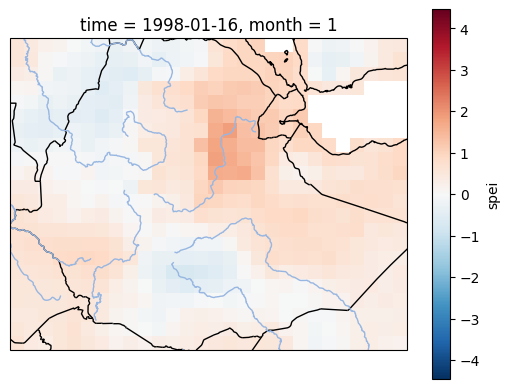

<Figure size 640x480 with 0 Axes>

In [12]:
desired_date = '1991-01-01'
clime = da.sel(time=slice('1991-01-01','2020-12-31'))
clime = clime.groupby('time.month').mean('time')
print(clime)

#year for anomaly = 1998 and is called year_sel
year_sel = da.sel(time=slice('1998-01-01','1998-12-31'))

year_anom = year_sel.groupby('time.month') - clime
year_anom_date = year_anom.sel(time=desired_date,method='nearest')
#year_anom_date['spei'].plot()

ax = plt.axes(projection=ccrs.PlateCarree())
#seas_anom.sel(season='SON').plot(ax=ax,transform=ccrs.PlateCarree())
year_anom_date['spei'].plot(ax=ax,transform=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.RIVERS)
# for extent the order is  [West,East,South,North]
ax.set_extent([33, 47, 3.5, 14.5])
plt.show()
plt.clf()